In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Number of Sunflowers Detected: 14


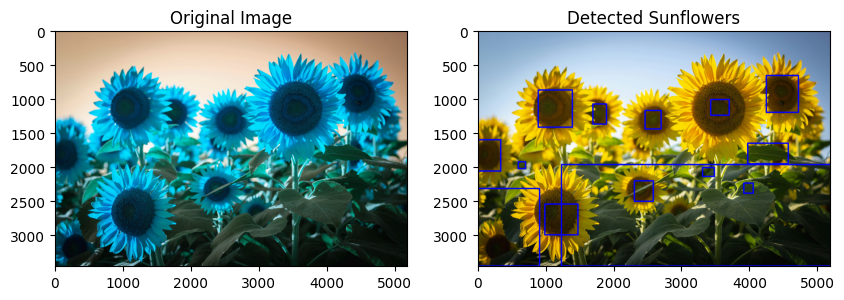

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('images/flower.jpg')
# Convert BGR to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = image_rgb.copy() 
# Define range for dark color in HSV (typical for sunflower centers)
lower_dark = np.array([0, 0, 0])
upper_dark = np.array([180, 255, 100])

# Convert RGB to HSV 
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Create mask for dark color
mask = cv2.inRange(hsv_image, lower_dark, upper_dark)

# Perform morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100,100))
open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel)

# Find contours 
contours,_ = cv2.findContours(close.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours that are not flower centers
sunflower_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Count number of sunflowers based on contours found
number_of_sunflowers = len(sunflower_contours)

print(f'Number of Sunflowers Detected: {number_of_sunflowers}')

# Draw contours on original image 
for cnt in sunflower_contours:
    # Get bounding box coordinates around each contour 
    x,y,w,h = cv2.boundingRect(cnt)
    # Draw rectangle around each contour on original colored image 
    detected_flowers_image = cv2.rectangle(image_rgb,(x,y),(x+w,y+h),(0,0,255),20)

# Display original image and detected flowers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(detected_flowers_image)
plt.title('Detected Sunflowers')
plt.show()
